Sean Kelly
11/19/20
HW 19

1b.
---

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

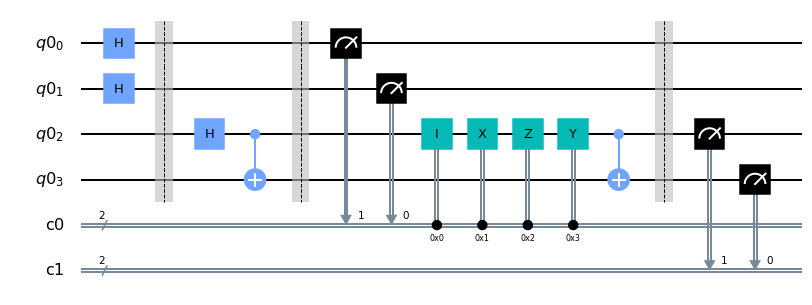

In [2]:
#3 qubits in quantum register
qr = QuantumRegister(4)

#Create circuit with 3 quantum registers
circ = QuantumCircuit(qr)

#2 classical bits in Alice's classical register
cr_a = ClassicalRegister(2)
circ.add_register(cr_a)

#put first 2 qubits in superposition
circ.h(0)
circ.h(1)
circ.barrier()

#create bell pair
circ.h(2)
circ.cx(2,3)
circ.barrier()

#make measurement on Alice's qubits
circ.measure(0,cr_a[1])
circ.measure(1,cr_a[0])

#control gates based on classical measurements
circ.i(qr[2]).c_if(cr_a,0) #00 in binary == 0 in decimal
circ.x(qr[2]).c_if(cr_a,1) #01 == 1
circ.z(qr[2]).c_if(cr_a,2) #10 == 2
circ.y(qr[2]).c_if(cr_a,3) #11 == 3

circ.cx(2,3)
circ.barrier()

#2 classical bits in Bobs's classical register
cr_b = ClassicalRegister(2)
circ.add_register(cr_b)
circ.measure(2,cr_b[1])
circ.measure(3,cr_b[0])

circ.draw('mpl')

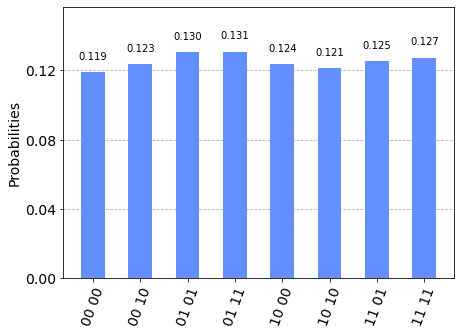

In [3]:
#Plot 10000 measurements
sim = Aer.get_backend('qasm_simulator')
res = execute(circ,sim,shots=10000).result().get_counts()
plot_histogram(res)